In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

%matplotlib inline

#Question 4

Calculate BP Reactivity...

In [6]:
drho_dB = -0.01
rho_0 = 0.2
fuel_rho = lambda b: drho_dB*b + rho_0

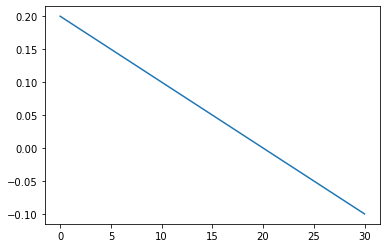

In [7]:
fig, ax=plt.subplots()
burnup = np.linspace(0,30,100)
ax.plot(burnup, fuel_rho(burnup))

In [8]:
BP_rho_0 = -0.09
BP_rho = lambda b:BP_rho_0*0.87**b

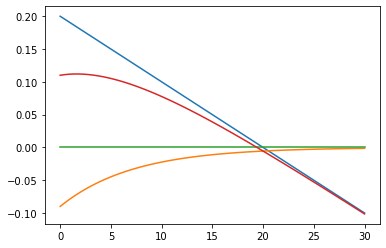

In [9]:
fig, ax=plt.subplots()
burnup = np.linspace(0,30,100)
ax.plot(burnup, fuel_rho(burnup))
ax.plot(burnup, BP_rho(burnup))
ax.plot(burnup, np.zeros((100,)))
ax.plot(burnup, fuel_rho(burnup) + BP_rho(burnup))

In [10]:
fuel_rho = lambda f, b: drho_dB*b + f
core_rho = lambda f, b: fuel_rho(f, b) + BP_rho(b)
fuel_rho_0 = scipy.optimize.brentq(core_rho, 0.2, 0.25, args=(20.0), xtol=1.e-12)

In [11]:
fuel_rho_0

0.20555427734466766

In [12]:
fuel_rho = lambda b: drho_dB*b + fuel_rho_0

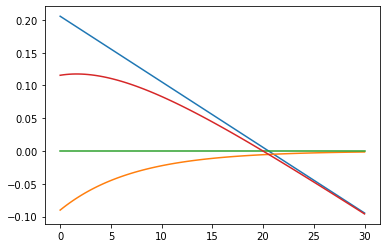

In [13]:
fig, ax=plt.subplots()
burnup = np.linspace(0,30,100)
ax.plot(burnup, fuel_rho(burnup))
ax.plot(burnup, BP_rho(burnup))
ax.plot(burnup, np.zeros((100,)))
ax.plot(burnup, fuel_rho(burnup) + BP_rho(burnup))

In [14]:
core_rho = lambda b: fuel_rho(b) + BP_rho(b)
scipy.optimize.brentq(core_rho, 15, 25, xtol=1.e-12)

20.0

In [15]:
scipy.optimize.brentq(fuel_rho, 15, 25, xtol=1.e-12)

20.555427734466768

In [16]:
boron_rho = lambda b: - (fuel_rho(b) + BP_rho(b))

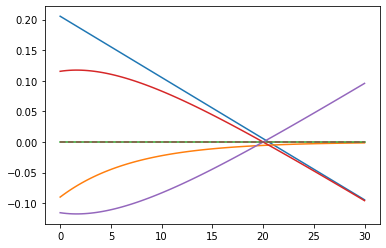

In [18]:
fig, ax=plt.subplots()
burnup = np.linspace(0,30,100)
ax.plot(burnup, fuel_rho(burnup))
ax.plot(burnup, BP_rho(burnup))
ax.plot(burnup, np.zeros((100,)))
ax.plot(burnup, fuel_rho(burnup) + BP_rho(burnup))
ax.plot(burnup, boron_rho(burnup))
ax.plot(burnup, fuel_rho(burnup) + BP_rho(burnup) + boron_rho(burnup), linestyle="dashed")

In [19]:
boron_worth = -0.0001
boron_ppm = lambda b: boron_rho(b) / boron_worth

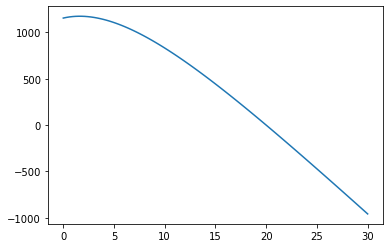

In [20]:
fig, ax=plt.subplots()
burnup = np.linspace(0,30,100)
ax.plot(burnup, boron_ppm(burnup))

In [21]:
boron_ppm_hzp = lambda b: (boron_rho(b) - 0.04) / boron_worth

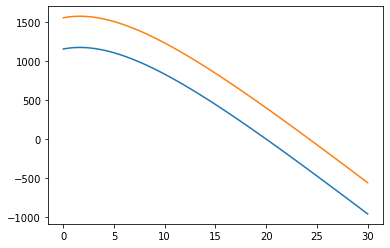

In [22]:
fig, ax=plt.subplots()
burnup = np.linspace(0,30,100)
ax.plot(burnup, boron_ppm(burnup))
ax.plot(burnup, boron_ppm_hzp(burnup))